In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv ('/Users/zahiramohammed/Desktop/DAPM_dataset_new.csv')


In [3]:
X = data[['age', 'bmi']]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #Fit_transform scales the features to have mean 0 and variance 1
number_of_clusters = 5
#AgglomerativeClustering model is created using ward linkage and number of clusters set previously
agg_clustering = AgglomerativeClustering(n_clusters=number_of_clusters)
cluster_labels = agg_clustering.fit_predict(X_scaled)

Cluster Statistics:
   Cluster    gender        age  hypertension  heart_disease  smoking_history  \
0        0  0.617021  68.212766      0.134752       0.078014        -0.283688   
1        1  0.606250  42.868750      0.062500       0.025000        -0.081250   
2        2  0.603175  43.507937      0.079365       0.047619        -0.238095   
3        3  0.560606  15.481212      0.015152       0.000000        -0.060606   
4        4  0.557143  21.385714      0.014286       0.014286         0.057143   

         bmi  HbA1c_level  blood_glucose_level  diabetes  
0  27.591348     5.672340           145.936170  0.198582  
1  27.353063     5.380625           133.587500  0.056250  
2  40.571270     5.563492           143.587302  0.142857  
3  19.850606     5.242424           136.378788  0.060606  
4  26.853286     5.422857           129.928571  0.000000  


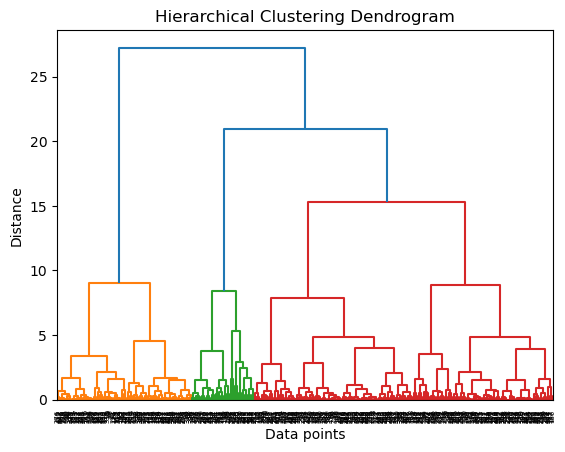

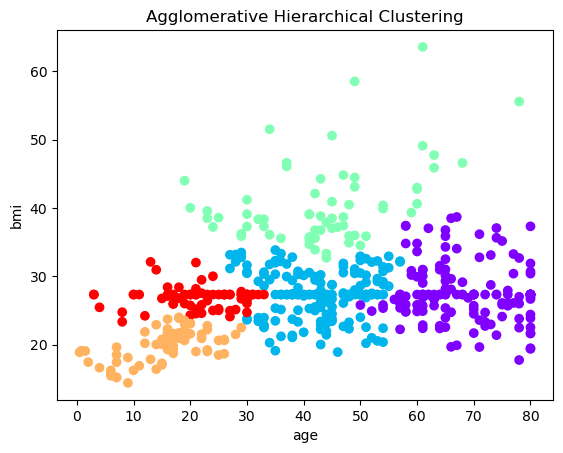

In [14]:
data['Cluster'] = cluster_labels
cluster_stats = data.groupby('Cluster').mean().reset_index()
print("Cluster Statistics:")
print(cluster_stats)


linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix) #Dendrogram visualizes the heirarchical clustering steps and distances between clusters at each step
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()
#Scatter plot colors data points by cluster label to visualize clustering results on original data
plt.scatter(X['age'], X['bmi'], c=cluster_labels, cmap='rainbow')
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('Agglomerative Hierarchical Clustering')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
score = silhouette_score(X_scaled, cluster_labels)
print('Silhouette Score:', score)

Silhouette Score: 0.3366339313796635
